# Linear Regression

#1 It’s a supervised machine learning algorithm which learns from given x dependent variable and Y as quantifiable variable and predicts New Y from given new X.
#2 It works in a way such that it finds the best fit line from the given data.
Clearly stated, the goal of linear regression is to fit a line to a set of points.

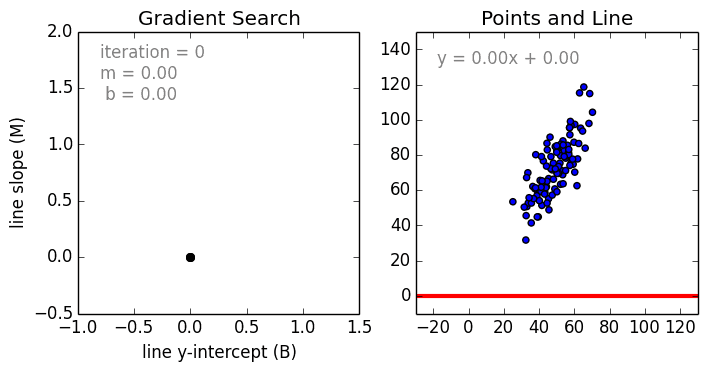

# Gradient Descent

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

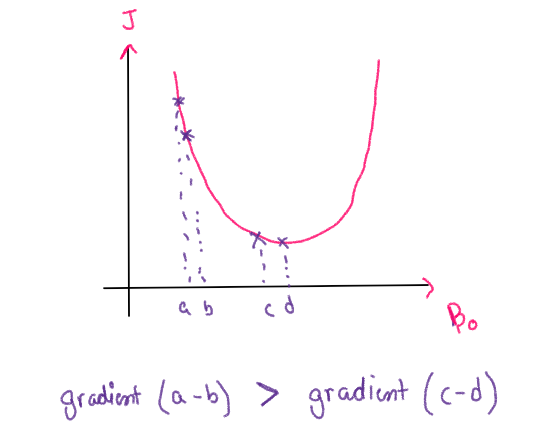

# Learning Rate

Pick a value for the learning rate α. The learning rate determines how big the step would be on each iteration.
If α is very small, it would take long time to converge and become computationally expensive.
If α is large, it may fail to converge and overshoot the minimum.

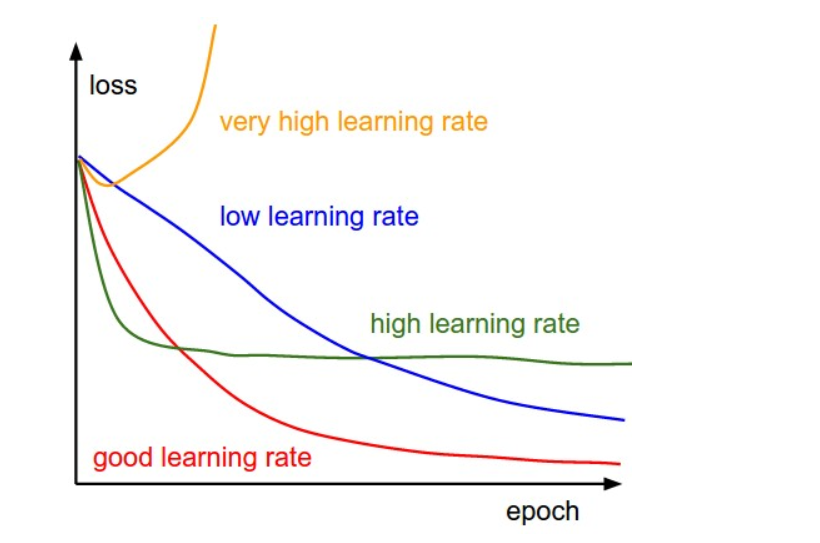

# Cost Function & Gradient

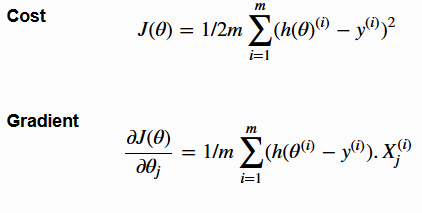

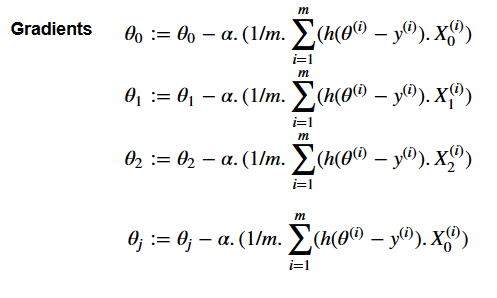

## Import Libraries


In [178]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
%matplotlib inline

from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

## Load File

In [179]:
filename= '/home/smriti/CourseWork/SEMESTER-2/SMAI/Assignment_2/Datasets/Question-4/weather.csv'
dataset = pd.read_csv(filename, low_memory= False)
dataset= dataset.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis=1)
dataset.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


## Split dataset into Train & Validation data

In [180]:
def split_data(dataset):
    np.random.shuffle(dataset.values)
    length= int(0.2*len(dataset))
    train_data = dataset[length:]
    valid_data = dataset[:length]

    return train_data.to_numpy(), valid_data.to_numpy()

## Normalization of Dataset

In [181]:
def normalize(dfObj):
    minValuesObj = (dfObj.min()).tolist()
    
    maxValuesObj = (dfObj.max()).tolist()
    
    dfObj= dfObj.to_numpy()

    for i in range (dfObj.shape[1]):
        for j in range (dfObj.shape[0]):
            dfObj[j][i]= (dfObj[j][i]- (minValuesObj[i]))/(maxValuesObj[i]-minValuesObj[i])
    
    dfObj= pd.DataFrame(dfObj)
    return dfObj

In [182]:
dataset= normalize(dataset)

train_data, valid_data= split_data(dataset)

train_labels= train_data[:, 1]                     #extracted apparent temperature
train_data= np.delete(train_data, 1, axis=1)       #deleted apparent temperature

valid_labels= valid_data[:, 1]                     #extracted apparent temperature
valid_data= np.delete(valid_data, 1, axis=1)       #deleted apparent temperature

## Define No. of Iterations

In [183]:
iterations= 1000

## Calculate Cost

In [184]:
def  cal_cost(theta,X,y):
    length = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*length) * np.sum(np.square(predictions-y))
    return cost

## Get in suitable dimensions

In [185]:
def processing(length, X, y, theta):
    rand_ind = np.random.randint(0,length)
    X_i = X[rand_ind,:].reshape(1,X.shape[1])
    y_i = y[rand_ind].reshape(1,1)
    
    return X_i, y_i, np.dot(X_i,theta)

## Update Theta 

In [186]:
def modify_theta(length, theta, X_i, y_i, prediction, learning_rate):
    return theta -(1/length)*learning_rate*( X_i.T.dot((prediction - y_i)))

## Gradient Descent Algorithm

In [187]:
def gradient_descent(X,y,theta, learning_rate):
    global iterations
    length = len(y)
    
    for it in range(iterations):
        cost =0.0
        for i in range(length):
            X_i, y_i, prediction= processing(length, X, y, theta)
            theta= modify_theta(length, theta, X_i, y_i, prediction, learning_rate)
            cost += cal_cost(theta,X_i,y_i)
#         print ("cost= ", cost)
    
    return theta

## Report Theta

In [188]:
theta_list= []
learning_rate= [0.1, 0.5,0.8]
for i in range (3):
    X_b = np.c_[np.ones((len(train_data),1)),train_data]
    theta_list.append(np.random.randn(7,1))
    theta_list[i]=(gradient_descent(X_b,train_labels,theta_list[i], learning_rate[i]))

### Calculate R2-Score, Mean Squared Error, Mean Absolute Error & Explained Variance Score

In [189]:
X_valid = np.c_[np.ones((len(valid_data),1)),valid_data]
R2_score= []
Mean_squared_error= []
Mean_absolute_error= []
Explained_variance_score= []
for i in range (3):
    y_pred= X_valid.dot(theta_list[i])
    R2_score.append(r2_score(valid_labels, y_pred))
    Mean_squared_error.append(mean_squared_error(valid_labels, y_pred))
    Mean_absolute_error.append(mean_absolute_error(valid_labels, y_pred))
    Explained_variance_score.append(explained_variance_score(valid_labels, y_pred))

## Analysis

For learning rate 0.1:


In [190]:
print ("R2 Score= ", R2_score[0])
print ("Mean Squared Error= ", Mean_squared_error[0])
print ("Mean Absolute Error= ", Mean_absolute_error[0])
print ("Explained Variance Score= ", Explained_variance_score[0])

R2 Score=  0.4741241226570957
Mean Squared Error=  0.013780984764442599
Mean Absolute Error=  0.08969080317591269
Explained Variance Score=  0.4741325102710271


For learning rate 0.5:

In [191]:
print ("R2 Score= ", R2_score[1])
print ("Mean Squared Error= ", Mean_squared_error[1])
print ("Mean Absolute Error= ", Mean_absolute_error[1])
print ("Explained Variance Score= ", Explained_variance_score[1])

R2 Score=  0.9867205712146769
Mean Squared Error=  0.00034799771895927293
Mean Absolute Error=  0.014518792742326316
Explained Variance Score=  0.9867249511313113


For learning rate 0.8:

In [192]:
print ("R2 Score= ", R2_score[2])
print ("Mean Squared Error= ", Mean_squared_error[2])
print ("Mean Absolute Error= ", Mean_absolute_error[2])
print ("Explained Variance Score= ", Explained_variance_score[2])

R2 Score=  0.9884848867131925
Mean Squared Error=  0.00030176246449663664
Mean Absolute Error=  0.013648711905461857
Explained Variance Score=  0.9884857220114395


## Comparisions

Learning Rate vs R2 Score



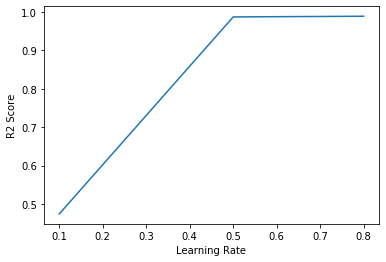

In [193]:
print ('Learning Rate vs R2 Score')
print()
plt.plot(learning_rate, R2_score)
plt.xlabel('Learning Rate')
plt.ylabel('R2 Score')
plt.show()

Learning Rate vs Mean Squared Error



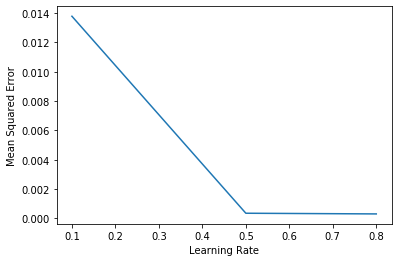

In [194]:
print ('Learning Rate vs Mean Squared Error')
print()
plt.plot(learning_rate, Mean_squared_error)
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.show()

Learning Rate vs Mean Absolute Error



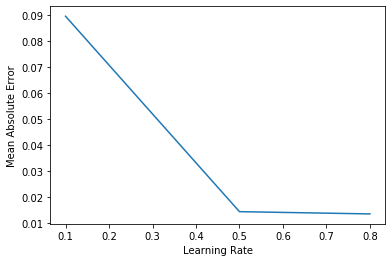

In [195]:
print ('Learning Rate vs Mean Absolute Error')
print()
plt.plot(learning_rate, Mean_absolute_error)
plt.xlabel('Learning Rate')
plt.ylabel('Mean Absolute Error')
plt.show()

Learning Rate vs Explained Variance Score



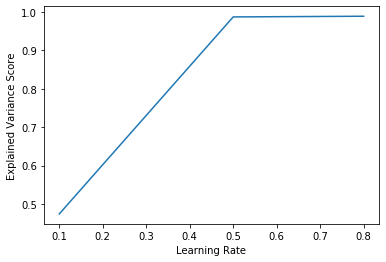

In [196]:
print ('Learning Rate vs Explained Variance Score')
print()
plt.plot(learning_rate, Explained_variance_score)
plt.xlabel('Learning Rate')
plt.ylabel('Explained Variance Score')
plt.show()